In [446]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


In [447]:
NUM_SIMS = 1000
BIN_SIZE_MATCHES = 1
BIN_SIZE_LIKES = 1

In [448]:
df = pd.read_csv('../results/user_data.csv')

In [449]:
MALE_COUNT = sum(df['gender'] == 'MALE')/NUM_SIMS
FEMALE_COUNT = sum(df['gender'] == 'FEMALE')/NUM_SIMS

In [450]:
df['attractiveness_tier'] = [math.floor(x*100/10) for x in df['attractiveness']]

In [451]:
df.groupby(['gender']).mean()[['likes','matches']]

,likes,matches
gender,,
FEMALE,93.744144,6.351652
MALE,6.789580,3.171064


In [452]:
df.groupby(['gender']).median()[['likes','matches']]

,likes,matches
gender,,
FEMALE,65.0,5.0
MALE,4.0,2.0


In [453]:
df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

likes    matches
gender attractiveness_tier                       
FEMALE 0                     61.956303   4.213445
       1                     62.090379   4.281341
       2                     62.334380   4.186813
       3                     62.161660   4.213162
       4                     62.489083   4.298399
       5                     61.753030   4.101515
       6                     61.781155   4.101824
       7                    129.246772   8.680057
       8                    184.340807  12.536622
       9                    184.482143  12.574405
MALE   0                      3.927232   1.876219
       1                      3.975479   1.864368
       2                      4.019113   1.910550
       3                      3.974074   1.841481
       4                      3.991183   1.883909
       5                      4.065683   1.885609
       6                      3.916048   1.830609
       7                      4.066421   1.960148
       8                     13.542105   6.254135
       9                     22.972244  10.659985

In [454]:
df.groupby(['gender']).median()[['likes','matches']]

,likes,matches
gender,,
FEMALE,65.0,5.0
MALE,4.0,2.0


In [455]:
grouped_data = df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

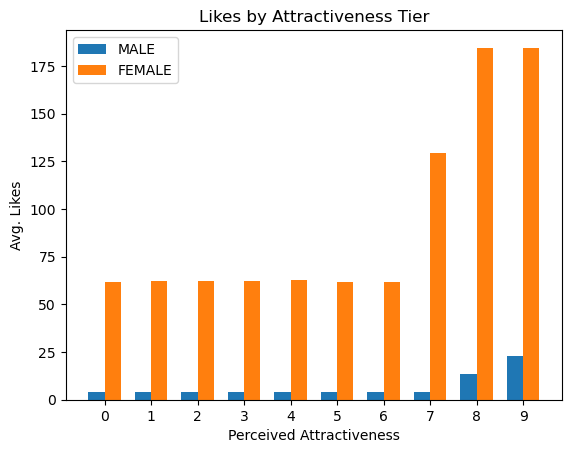

In [456]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['likes'], width=bar_width, label='MALE')
plt.bar(r2, female_data['likes'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Likes')
plt.title('Likes by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

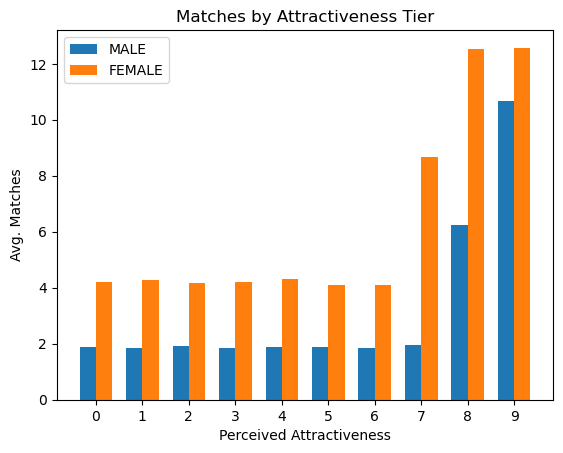

In [457]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['matches'], width=bar_width, label='MALE')
plt.bar(r2, female_data['matches'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Matches')
plt.title('Matches by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

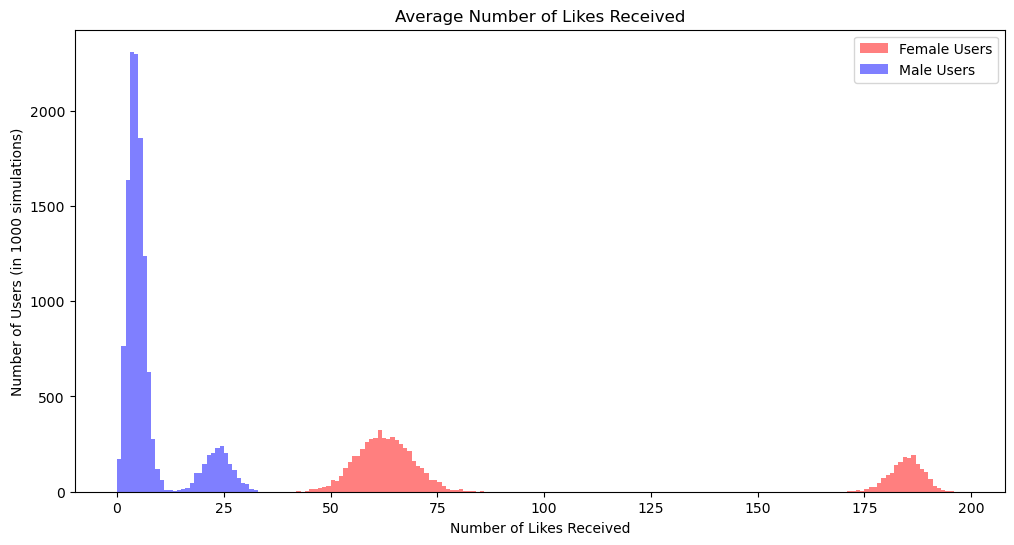

In [458]:
female_likes_total = [x for x in df[df['gender'] == 'FEMALE']['likes']]
male_likes_total = [x for x in df[df['gender'] == 'MALE']['likes']]

def convert_bins_to_size(data_range, X):
    min_val = int(min(data_range))
    max_val = int(max(data_range))
    new_bins = list(range(min_val, max_val + X + 1, X))
    return new_bins

plt.figure(figsize=(12, 6))
data_range = range(int(min(male_likes_total)), int(max(female_likes_total)) + 2)
new_bins_likes = convert_bins_to_size(male_likes_total+female_likes_total, BIN_SIZE_LIKES)
plt.hist(female_likes_total, bins=new_bins_likes, alpha=0.5, label='Female Users', color='red')
plt.hist(male_likes_total, bins=new_bins_likes, alpha=0.5, label='Male Users', color='blue')
plt.title("Average Number of Likes Received")
plt.xlabel("Number of Likes Received")
plt.ylabel("Number of Users (in 1000 simulations)")
plt.legend(loc='upper right')
plt.show()


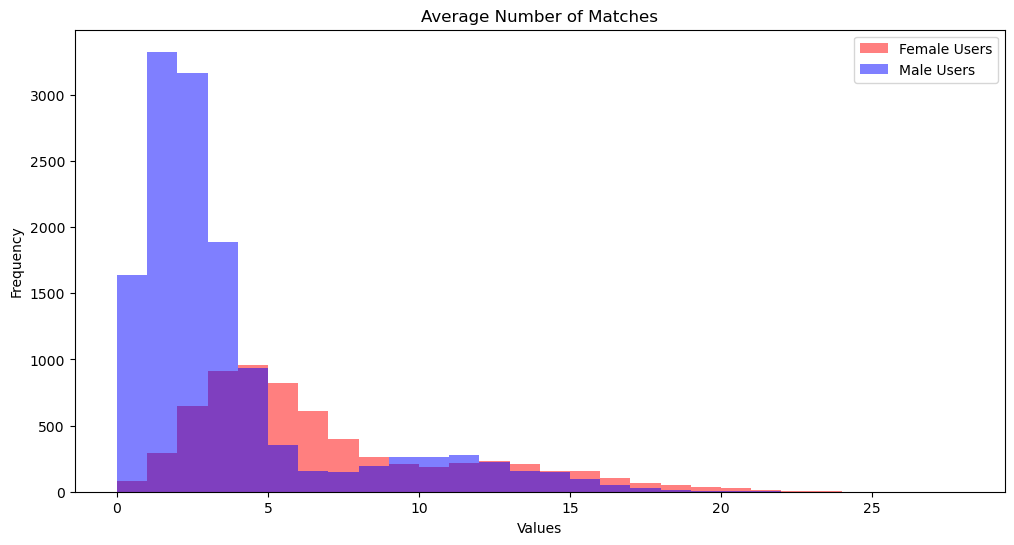

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [459]:
female_matches_total = [x for x in df[df['gender'] == 'FEMALE']['matches']]
male_matches_total = [x for x in df[df['gender'] == 'MALE']['matches']]


plt.figure(figsize=(12, 6))
data_range = range(int(min(male_matches_total)), int(max(female_matches_total)) + 10)
new_bins_matches = convert_bins_to_size(male_matches_total+female_matches_total, BIN_SIZE_MATCHES)
plt.hist(female_matches_total, bins=new_bins_matches, alpha=0.5, label='Female Users', color='red')
plt.hist(male_matches_total, bins=new_bins_matches, alpha=0.5, label='Male Users', color='blue')
plt.title("Average Number of Matches")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()
print(new_bins_matches)

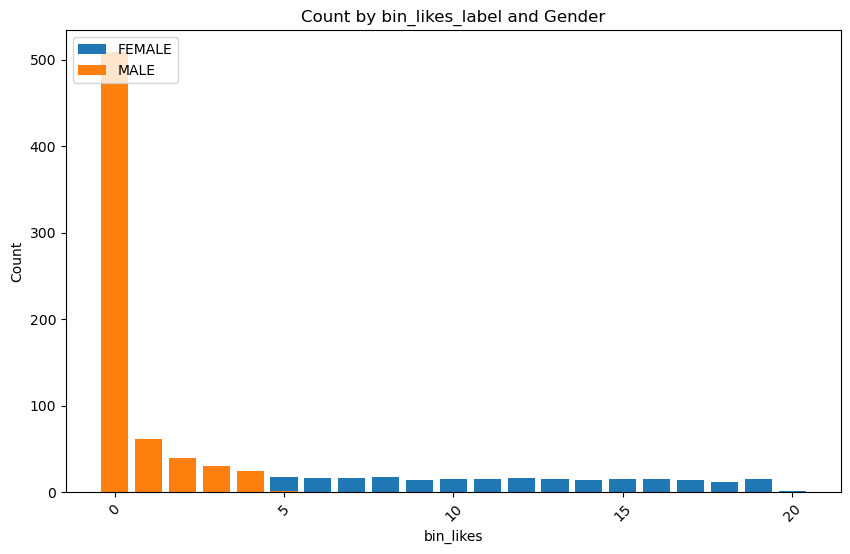

In [460]:
import matplotlib.pyplot as plt


# Combine and sort the unique 'bin_likes_label' values for both genders
x = sorted(df_chart['bin_likes'].unique())

# Set the figure size
plt.figure(figsize=(10, 6))

# Group the data by 'gender'
grouped_data = df_chart.groupby('gender')

# Plot the bars for each gender
for gender, group in grouped_data:
    # Get the counts for the 'bin_likes_label' values in the correct order
    counts = group.set_index('bin_likes').reindex(x)['count']
    plt.bar(x, counts, label=gender)

# Set the x-axis labels and tick positions
plt.xlabel('bin_likes')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Set the title and legend
plt.title('Count by bin_likes_label and Gender')
plt.legend()

# Show the plot
plt.show()


In [1]:
# df['bin_likes'] = pd.cut(df['likes'], new_bins_likes, labels=False, right=False)
# df['bin_likes_label'] = [str(new_bins_likes[x]) for x in df['bin_likes']]
# df.groupby(['gender','bin_likes','bin_likes_label']).count()[['attractiveness']]/NUM_SIMS

In [462]:
df['bin_matches'] = pd.cut(df['matches'], new_bins_matches, labels=False, right=False)
df['bin_matches_label'] = [str(new_bins_matches[x]) for x in df['bin_matches']]
grouped_data_matches = df.groupby(['gender','bin_matches','bin_matches_label']).count()[['attractiveness']]/NUM_SIMS
df_chart_matches = grouped_data_matches.reset_index()
df_chart_matches = df_chart_matches.rename(columns={'attractiveness': 'count'})
df_chart_matches['percentage'] = df_chart_matches.apply(lambda x: 100*x['count']/(MALE_COUNT*int(x['gender']=='MALE') + FEMALE_COUNT*int(x['gender']=='FEMALE')), axis = 1)
df_chart_matches

,gender,bin_matches,bin_matches_label,count,percentage
0,FEMALE,0,0,0.084,1.261261
1,FEMALE,1,1,0.293,4.399399
2,FEMALE,2,2,0.648,9.729730
3,FEMALE,3,3,0.915,13.738739
4,FEMALE,4,4,0.961,14.429429
5,FEMALE,5,5,0.824,12.372372
6,FEMALE,6,6,0.609,9.144144
7,FEMALE,7,7,0.396,5.945946
8,FEMALE,8,8,0.261,3.918919
9,FEMALE,9,9,0.213,3.198198


In [463]:
grouped_data_likes = df.groupby(['gender','bin_likes','bin_likes_label']).count()[['attractiveness']]/NUM_SIMS
df_chart_likes = grouped_data_likes.reset_index()
df_chart_likes = df_chart_likes.rename(columns={'attractiveness': 'count'})
df_chart_likes['percentage'] = df_chart_likes.apply(lambda x: 100*x['count']/(MALE_COUNT*int(x['gender']=='MALE') + FEMALE_COUNT*int(x['gender']=='FEMALE')), axis = 1)
df_chart_likes.to_csv('test_likes.csv')